In [21]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from scipy import stats

# Get the file
# Load the CSV file created in Part 1 into a Pandas DataFrame
health_data_df = pd.read_csv("2019_Health_Data.csv")

# Display sample data
health_data_df.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [22]:

health_data_df.rename(
    columns={
        'How many employees does your company or organization have?': 'Number of Employees',
        'What US state or territory do you *live* in?': 'US State',
        'Have you ever been *diagnosed* with a mental health disorder?': 'Diagnosed?',
        '*Are you self-employed?*': 'Self-employed',
        '*If possibly, what disorder(s) do you believe you have?*': 'Possible Diagnosis',
        '*If so, what disorder(s) were you diagnosed with?*': 'Diagnosis',
        'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Treament',
        'Do you have a family history of mental illness?': 'Family History',
        'Are you openly identified at work as a person with a mental health issue?': 'Identified with mental health issue at work',
        'What is your age?': 'Age',
        'what is your gender': 'Gender',
        'What country do you *live* in?': 'Country',
        'What US or territory do you *live* in?': 'State',
    },
    inplace=True
)


health_data_df.head()




,Self-employed,Number of Employees,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),Age,What is your gender?,Country,US State,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


health_data_df=health_data_df[['Self-employed',
                                'Number of Employees',
                               'Diagnosed?',
                               'Possible Diagnosis',
                               'Diagnosis',
                               'Treament',
                               'Family History',
                               'Identified with mental health issue at work',
                               'Age',
                               'What is your gender?',
                               'Country',
                               'US State']]

In [23]:
state_count = health_data_df['US State'].value_counts()
state_count


state_count_df = state_count.to_frame()

state_count_df.rename(columns={'count': 'Total Responses'}, inplace=True)



In [24]:
state_count_mh = health_data_df.loc[(health_data_df['Diagnosis'].notnull())]['US State'].value_counts()


state_count_mh_df = state_count_mh.to_frame()

state_count_mh_df.rename(columns={'count': 'Total with Diagnosed Mental Health Issues'}, inplace=True)



In [25]:
state = pd.merge(state_count_df, state_count_mh_df,on='US State',how='right')


In [26]:
state["Percentage with Diagnosed Mental Health Issues"] = (
    state['Total with Diagnosed Mental Health Issues'] / state["Total Responses"] * 100
).map("{:.2f}%".format)

state = state.sort_values(by="Total Responses", ascending=False)


state

,Total Responses,Total with Diagnosed Mental Health Issues,Percentage with Diagnosed Mental Health Issues
US State,,,
California,20,7,35.00%
Nebraska,18,9,50.00%
New York,15,8,53.33%
Colorado,14,6,42.86%
Washington,13,9,69.23%
Tennessee,13,3,23.08%
Illinois,12,7,58.33%
Virginia,7,3,42.86%
North Carolina,7,2,28.57%


<function matplotlib.pyplot.show(close=None, block=None)>

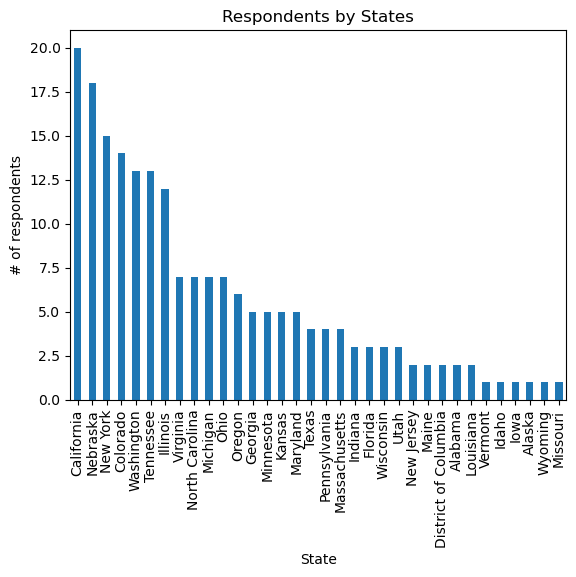

In [27]:
respondent_chart = state["Total Responses"].plot(kind= "bar", title="Respondents by States", xlabel="State", ylabel="# of respondents")
plt.show

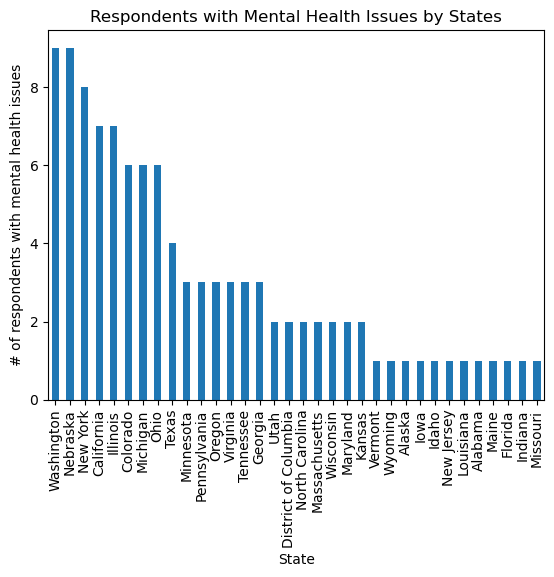

In [29]:
state = state.sort_values(by="Total with Diagnosed Mental Health Issues", ascending=False)

respondent_mh_chart = state["Total with Diagnosed Mental Health Issues"].plot(kind= "bar",
                                                                               title="Respondents with Mental Health Issues by States",
                                                                                 xlabel="State",
                                                                                   ylabel="# of respondents with mental health issues")

